In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
#import dateutil
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


# this code written by Paul AG

nyc_crime_sqft_rent_by_boro=pd.read_csv("NYC_CRIME_PRICE_SQFT_RENTAL_BY_BORO.csv")

boro=['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
# Kings is synomous with Brooklyn (same land mass)
county=['New York', 'Bronx', 'Kings', 'Queens', 'Richmond']


In [2]:
nyc_crime_sqft_rent_by_boro.columns

Index(['Date', 'MANHATTAN_Crime_Cnt', 'BROOKLYN_Crime_Cnt', 'QUEENS_Crime_Cnt',
       'BRONX_Crime_Cnt', 'STATEN_ISLAND_Crime_Cnt',
       'Manhattan price per sqft', 'Brooklyn price per sqft',
       'Bronx price per sqft', 'Queens price per sqft',
       'Staten Island price per sqft', 'Manhattan rental price',
       'Brooklyn rental price', 'Bronx rental price', 'Queens rental price',
       'Staten Island rental price'],
      dtype='object')

In [3]:
df=nyc_crime_sqft_rent_by_boro
manhattan_crime_df=pd.DataFrame(nyc_crime_sqft_rent_by_boro, columns=['Date','MANHATTAN_Crime_Cnt'])

In [4]:
yr_df=df['Date'].str.split('-', expand=True)
crime_yr_df=manhattan_crime_df['Date'].str.split('-', expand=True)
crime_df=manhattan_crime_df.join(crime_yr_df)
crime_df=crime_df.rename(columns={0:'YR',1:'M'})
crime_df=crime_df.groupby(['YR']).sum()
crime_df=crime_df.rename(columns={'MANHATTAN_Crime_Cnt':'Manhattan Crime Cnt'})

In [5]:
manhattan_crime_df.head()

,Date,MANHATTAN_Crime_Cnt
0,2011-12,9735
1,2012-01,9784
2,2012-02,9181
3,2012-03,10389
4,2012-04,9964


In [6]:
crime_df.head()

,Manhattan Crime Cnt
YR,
2011,9735
2012,119956
2013,117883
2014,113398
2015,112890


In [20]:
total_crime=crime_df[crime_df.index>'2011'].sum()

In [9]:
crime_df2=crime_df[crime_df.index>'2011'].diff()

In [16]:
crime_df2

,Manhattan Crime Cnt
YR,
2012,NaN
2013,-2073.0
2014,-4485.0
2015,-508.0
2016,2284.0
2017,-3528.0


In [21]:
perc_change_5YR=crime_df2.sum()/total_crime*100

In [22]:
perc_change_5YR

Manhattan Crime Cnt   -1.202697
dtype: float64

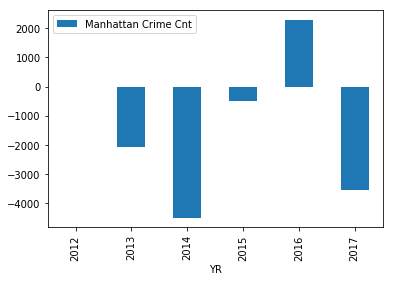

In [14]:
crime_df2.plot.bar()